# Dados de Furtos de Celulares (SP - 2021 a 2022)

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_roubos = pd.read_csv('/content/drive/MyDrive/Aulas/TCC/roubo-celulares.csv', low_memory=False)
df_furtos = pd.read_csv('/content/drive/MyDrive/Aulas/TCC/furto-celulares.csv', low_memory=False)

In [ ]:
print("furtos,", df_furtos.shape)
print("roubos,", df_roubos.shape)

furtos, (41519, 54)
roubos, (110156, 54)


## Análise de dados vazios

In [ ]:
df_roubos_na_perc = df_roubos[df_roubos.columns[df_roubos.isna().any()]].isna().sum() * 100 / df_roubos.shape[0]
df_furtos_na_perc = df_furtos[df_furtos.columns[df_furtos.isna().any()]].isna().sum() * 100 / df_furtos.shape[0]

### Colunas muito vazias (maior que 50%) e suas porcentagens

<AxesSubplot:>

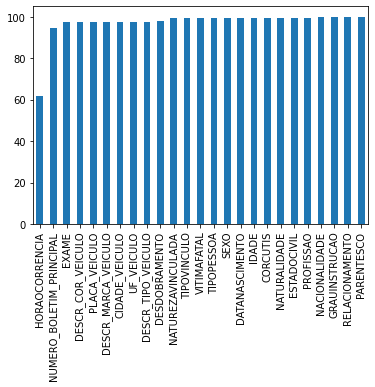

In [ ]:
df_roubos_colunas_muito_vazias = df_roubos_na_perc[df_roubos_na_perc >= 50].sort_values()
df_furtos_colunas_muito_vazias = df_furtos_na_perc[df_furtos_na_perc >= 50].sort_values()
df_furtos_colunas_muito_vazias.plot(kind="bar")

### Colunas pouco vazias (menor que 50%) e suas porcentagens

<AxesSubplot:>

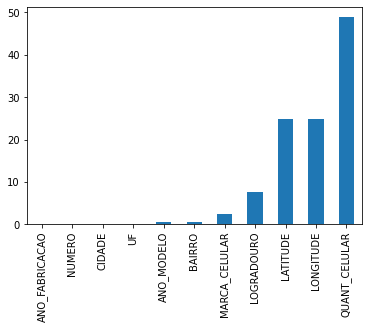

In [ ]:
df_roubos_colunas_pouco_vazias = df_roubos_na_perc[df_roubos_na_perc < 50].sort_values()
df_furtos_colunas_pouco_vazias = df_furtos_na_perc[df_furtos_na_perc < 50].sort_values()
df_furtos_colunas_pouco_vazias.plot(kind="bar")

## Dados de localização 

### Top 10 Cidades com maior ocorrência dos furtos

<AxesSubplot:>

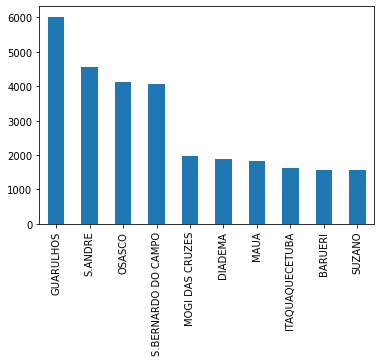

In [ ]:
df_roubos_cidades_maior_ocorrencias = df_roubos['CIDADE'].value_counts() * 100 / df_roubos.shape[0]
df_furtos_cidades_maior_ocorrencias = df_furtos['CIDADE'].value_counts() * 100 / df_furtos.shape[0]
df_furtos['CIDADE'].value_counts().head(10).plot(kind="bar")

### Top 10 Bairros com maior ocorrência dos furtos

<AxesSubplot:>

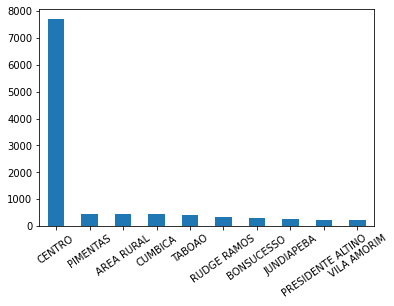

In [ ]:
df_roubos_bairros_maior_ocorrencias = df_roubos['BAIRRO'].str.upper().value_counts() * 100 / df_roubos.shape[0]
df_furtos_bairros_maior_ocorrencias = df_furtos['BAIRRO'].str.upper().value_counts() * 100 / df_furtos.shape[0]
df_furtos['BAIRRO'].str.upper().value_counts().head(10).plot(kind="bar", rot=35)

### Top 6 descrições de locais com maior ocorrência dos furtos

<AxesSubplot:>

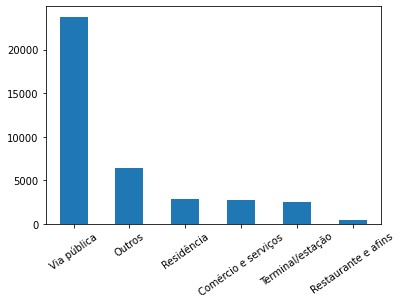

In [ ]:
df_roubos_descricaolocal_maior_ocorrencias = df_roubos['DESCRICAOLOCAL'].str.capitalize().value_counts() * 100 / df_roubos.shape[0]
df_furtos_descricaolocal_maior_ocorrencias = df_furtos['DESCRICAOLOCAL'].str.capitalize().value_counts() * 100 / df_furtos.shape[0]
df_furtos['DESCRICAOLOCAL'].str.capitalize().value_counts().head(6).plot(kind="bar", rot=35)

## Dados temporais

### Tempo de ocorrência dos furtos

<AxesSubplot:>

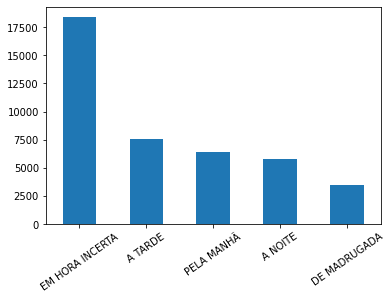

In [ ]:
df_roubos_periodoocorrencia_maior_ocorrencias = df_roubos['PERIDOOCORRENCIA'].value_counts() * 100 / df_roubos.shape[0]
df_furtos_periodoocorrencia_maior_ocorrencias = df_furtos['PERIDOOCORRENCIA'].value_counts() * 100 / df_furtos.shape[0]
df_furtos['PERIDOOCORRENCIA'].value_counts().plot(kind="bar", rot=35)

### Ano de registro das ocorrências

<AxesSubplot:>

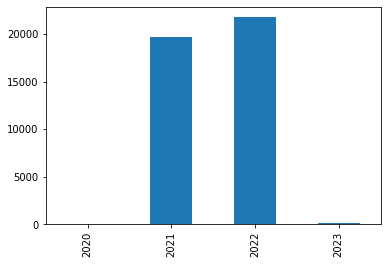

In [ ]:
df_roubos_anobo_maior_ocorrencias = df_roubos['ANO_BO'].value_counts().sort_index() * 100 / df_roubos.shape[0]
df_furtos_anobo_maior_ocorrencias = df_furtos['ANO_BO'].value_counts().sort_index() * 100 / df_furtos.shape[0]
df_furtos['ANO_BO'].value_counts().sort_index().plot(kind="bar")

### Meses com maior registro das ocorrências

<AxesSubplot:>

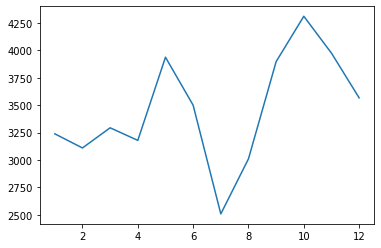

In [ ]:
df_roubos_datacomunicacao_maior_ocorrencias = pd.DatetimeIndex(df_roubos['DATACOMUNICACAO'], dayfirst=True).month.value_counts().sort_index() * 100 / df_roubos.shape[0]
df_furtos_datacomunicacao_maior_ocorrencias = pd.DatetimeIndex(df_furtos['DATACOMUNICACAO'], dayfirst=True).month.value_counts().sort_index() * 100 / df_furtos.shape[0]
pd.DatetimeIndex(df_furtos['DATACOMUNICACAO'], dayfirst=True).month.value_counts().sort_index().plot(kind="line")

## Dados gerais dos furtos

### Distribuição se ocorrências em flagrante

<AxesSubplot:>

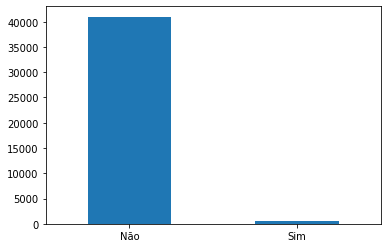

In [ ]:
df_roubos_flagrante_ocorrencias = df_roubos['FLAGRANTE'].value_counts() * 100 / df_roubos.shape[0]
df_furtos_flagrante_ocorrencias = df_furtos['FLAGRANTE'].value_counts() * 100 / df_furtos.shape[0]
df_furtos['FLAGRANTE'].value_counts().plot(kind="bar", rot=0)

### Top 6 marcas de celulares nas ocorrências registradas

<AxesSubplot:>

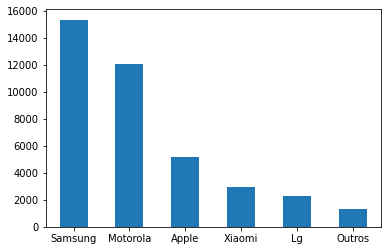

In [ ]:
df_roubos_marcacelular_maior_ocorrencias = df_roubos['MARCA_CELULAR'].str.capitalize().value_counts() * 100 / df_roubos.shape[0]
df_furtos_marcacelular_maior_ocorrencias = df_furtos['MARCA_CELULAR'].str.capitalize().value_counts() * 100 / df_furtos.shape[0]
df_furtos['MARCA_CELULAR'].str.capitalize().value_counts().head(6).plot(kind="bar", rot=0)

### Top 10 anos (de celulares ou dos veículos?) das ocorrências

<AxesSubplot:>

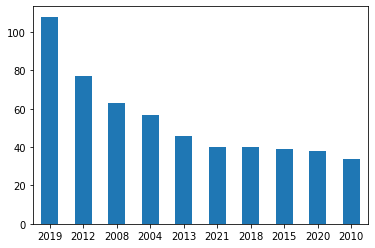

In [ ]:
df_roubos_anomodelo_maior_ocorrencias = df_roubos["ANO_MODELO"].dropna().loc[lambda x : x > 0].map(lambda x: int(x)).value_counts() * 100 / df_roubos.shape[0]
df_furtos_anomodelo_maior_ocorrencias = df_furtos["ANO_MODELO"].dropna().loc[lambda x : x > 0].map(lambda x: int(x)).value_counts() * 100 / df_furtos.shape[0]
df_furtos["ANO_MODELO"].dropna().loc[lambda x : x > 0].map(lambda x: int(x)).value_counts().head(10).plot(kind="bar", rot=0)

### Top 7 delegacias registradas nas ocorrências

<AxesSubplot:>

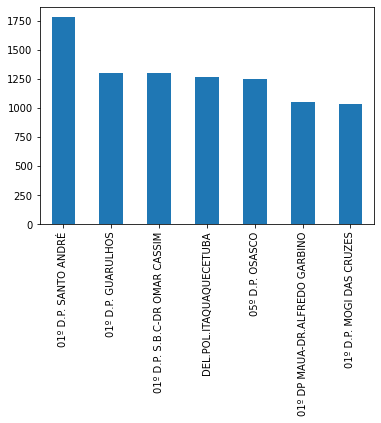

In [ ]:
df_roubos_delegacia_maior_ocorrencias = df_roubos['DELEGACIA_CIRCUNSCRICAO'].value_counts() * 100 / df_roubos.shape[0]
df_furtos_delegacia_maior_ocorrencias = df_furtos['DELEGACIA_CIRCUNSCRICAO'].value_counts() * 100 / df_furtos.shape[0]
df_furtos['DELEGACIA_CIRCUNSCRICAO'].value_counts().head(7).plot(kind="bar")

### Top 7 departamentos registrados nas ocorrências

<AxesSubplot:>

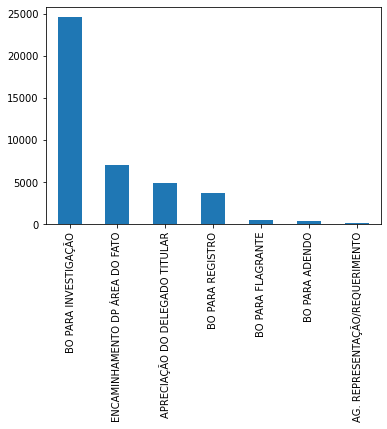

In [ ]:
df_roubos_solucao_maior_ocorrencias = df_roubos['SOLUCAO'].value_counts() * 100 / df_roubos.shape[0]
df_furtos_solucao_maior_ocorrencias = df_furtos['SOLUCAO'].value_counts() * 100 / df_furtos.shape[0]
df_furtos['SOLUCAO'].value_counts().head(7).plot(kind="bar")

### Descrição das idades e quantidades de celulares envolvidas nas ocorrências

In [ ]:
df_roubos_idades_quantidades_celulares = df_roubos[['IDADE', 'QUANT_CELULAR']].describe()
df_furtos_idades_quantidades_celulares = df_furtos[['IDADE', 'QUANT_CELULAR']].describe()
df_furtos_idades_quantidades_celulares

,IDADE,QUANT_CELULAR
count,289.000000,21223.000000
mean,28.228374,1.278095
std,11.625960,15.832264
min,11.000000,0.000000
25%,22.000000,1.000000
50%,27.000000,1.000000
75%,28.000000,1.000000
max,81.000000,1818.000000


# Comparação entre dados de furtos e roubos de celulares (SP - 2021 a 2022)

<AxesSubplot:>

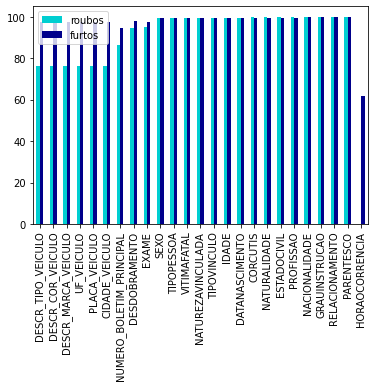

In [ ]:
pd.concat([df_roubos_colunas_muito_vazias, df_furtos_colunas_muito_vazias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

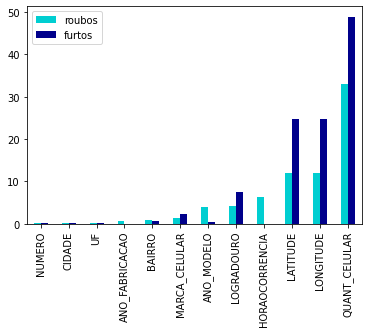

In [ ]:
pd.concat([df_roubos_colunas_pouco_vazias, df_furtos_colunas_pouco_vazias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

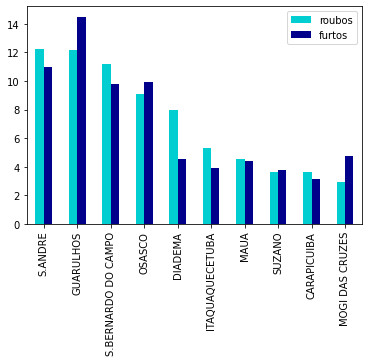

In [ ]:
pd.concat([df_roubos_cidades_maior_ocorrencias, df_furtos_cidades_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

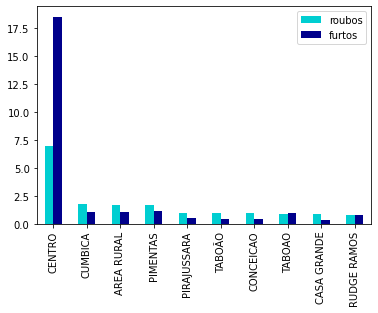

In [ ]:
pd.concat([df_roubos_bairros_maior_ocorrencias, df_furtos_bairros_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

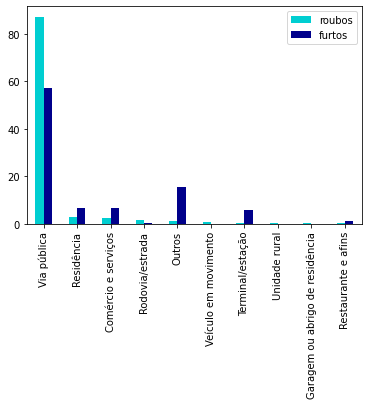

In [ ]:
pd.concat([df_roubos_descricaolocal_maior_ocorrencias, df_furtos_descricaolocal_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

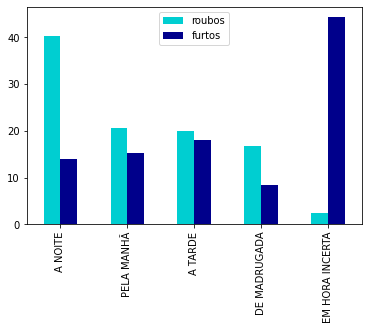

In [ ]:
pd.concat([df_roubos_periodoocorrencia_maior_ocorrencias, df_furtos_periodoocorrencia_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

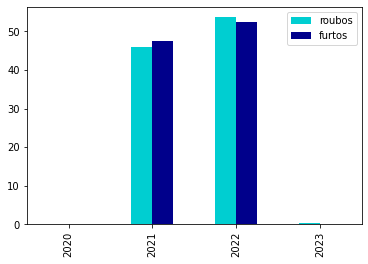

In [ ]:
pd.concat([df_roubos_anobo_maior_ocorrencias, df_furtos_anobo_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

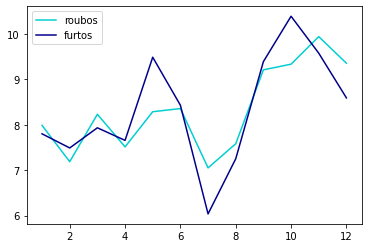

In [ ]:
pd.concat([df_roubos_datacomunicacao_maior_ocorrencias, df_furtos_datacomunicacao_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.line(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

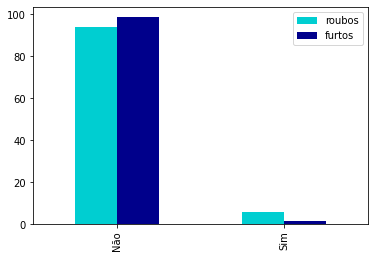

In [ ]:
pd.concat([df_roubos_flagrante_ocorrencias, df_furtos_flagrante_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

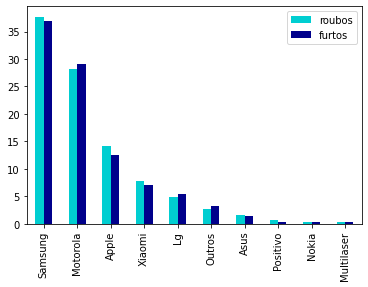

In [ ]:
pd.concat([df_roubos_marcacelular_maior_ocorrencias, df_furtos_marcacelular_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

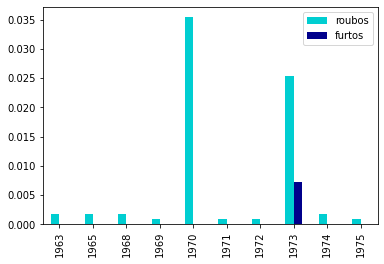

In [ ]:
pd.concat([df_roubos_anomodelo_maior_ocorrencias, df_furtos_anomodelo_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

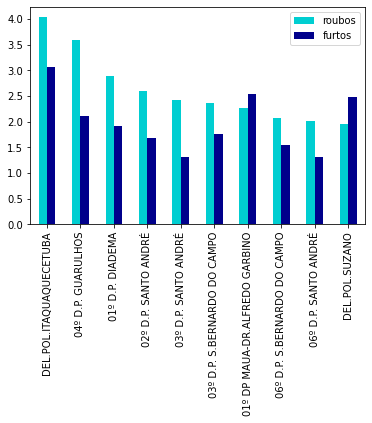

In [ ]:
pd.concat([df_roubos_delegacia_maior_ocorrencias, df_furtos_delegacia_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .head(10) \
    .plot.bar(color=['darkturquoise', 'darkblue'])

<AxesSubplot:>

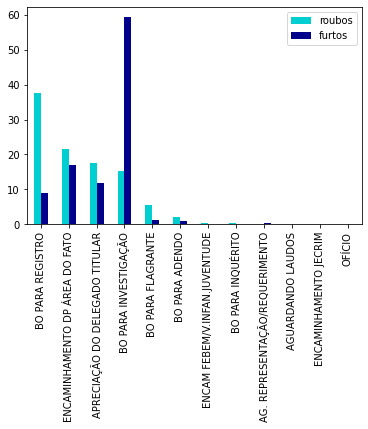

In [ ]:
pd.concat([df_roubos_solucao_maior_ocorrencias, df_furtos_solucao_maior_ocorrencias], axis=1) \
    .set_axis(['roubos', 'furtos'], axis='columns') \
    .plot.bar(color=['darkturquoise', 'darkblue'])

In [ ]:
pd.concat([df_roubos_idades_quantidades_celulares, df_furtos_idades_quantidades_celulares], axis=1) \
    .set_axis(['roubos.IDADE', 'roubos.QUANT_CELULAR', 'furtos.IDADE', 'furtos.QUANT_CELULAR'], axis='columns')

,roubos.IDADE,roubos.QUANT_CELULAR,furtos.IDADE,furtos.QUANT_CELULAR
count,352.000000,73742.000000,289.000000,21223.000000
mean,28.363636,1.175355,28.228374,1.278095
std,11.267715,9.217678,11.625960,15.832264
min,13.000000,0.000000,11.000000,0.000000
25%,22.000000,1.000000,22.000000,1.000000
50%,27.000000,1.000000,27.000000,1.000000
75%,31.250000,1.000000,28.000000,1.000000
max,75.000000,1000.000000,81.000000,1818.000000


In [1]:
plt.hist(df['IDADE'])

NameError: ignored